<a href="https://colab.research.google.com/github/Anson422/Anson-Eva-Valerie/blob/main/Stacked%20Bar%20Chart/All_natural_gas_imports_in_Europe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/Anson422/Anson-Eva-Valerie.git #clone the repository to the local machine
!git install pandas

Cloning into 'Anson-Eva-Valerie'...
remote: Enumerating objects: 5506, done.
remote: Counting objects: 100% (301/301), done.
remote: Compressing objects: 100% (243/243), done.
remote: Total 5506 (delta 215), reused 58 (delta 58), pack-reused 5205 (from 2)
Receiving objects: 100% (5506/5506), 9.01 GiB | 31.85 MiB/s, done.
Resolving deltas: 100% (1893/1893), done.
Updating files: 100% (2891/2891), done.
git: 'install' is not a git command. See 'git --help'.

The most similar command is
	instaweb


In [2]:
#This tells python to draw the graphs "inline" - in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.stats import norm
import statistics
import seaborn as sns

import pylab
import pandas as pd
import numpy as np

In [3]:
df=pd.read_excel("/content/Anson-Eva-Valerie/Stacked Bar Chart/data/quarterly_data 2024-10-03.xlsx")
df

,dates,Nord Stream,"Yamal (BY,PL)",Ukraine Gas Transit,Turkstream,Russia LNG,Russia,USA LNG,LNG less RU and USA,Norway,Algeria,UK,Azerbaijan,Libya
0,2021-03-31,15358.767633,9800.212527,9800.280924,2842.923903,3313.297135,41115.482123,4046.636956,9300.056200,20016.236610,10073.115669,1640.847652,1326.611411,914.029684
1,2021-06-30,15404.674290,9781.775321,10904.784728,2800.350375,4185.431649,43077.016363,7033.273347,10853.634810,19927.103754,9847.151268,1402.433750,2079.985046,772.946864
2,2021-09-30,13814.394331,7927.087842,9407.804200,3257.031165,1922.080024,36328.397561,3931.964138,8971.878168,23004.089289,8230.817689,1978.071210,2594.189696,827.956261
3,2021-12-31,15685.689929,3716.347772,9609.176896,3679.606779,3876.769107,36567.590483,5945.372823,10541.285255,23266.633750,8716.940050,3428.207872,2783.979061,801.294797
4,2022-03-31,14676.298610,2024.019694,6213.326652,3524.772532,5116.737828,31555.155315,14133.949131,10552.002362,23354.623895,8569.391952,3484.789383,2743.560731,512.836852
5,2022-06-30,13564.978276,649.777925,5339.892162,2434.798312,4668.580849,26658.027524,14897.026108,12234.781392,23893.976070,8361.206227,8164.030149,3107.038894,708.949297
6,2022-09-30,2264.982423,0.000000,3535.431775,3842.804850,4199.586221,13842.805269,13175.581999,14339.647314,23676.756738,8525.155166,8162.558954,3098.151523,593.110975
7,2022-12-31,0.000000,0.000000,3694.221499,3147.891807,4566.856133,11408.969439,12624.027920,17305.222743,23426.364254,8730.887417,6400.859889,3307.228577,873.443851
8,2023-03-31,0.000000,0.000000,2837.449532,2637.472494,5036.417725,10511.339751,14101.048245,13170.213642,23476.150905,7318.667675,4850.591245,3096.441891,691.302876
9,2023-06-30,0.000000,0.000000,3267.948682,2588.875575,4601.492368,10458.316626,16794.255840,14550.795481,22424.073815,8509.097454,6484.323957,3037.083973,722.073983


In [25]:
#2024
rows_2024_to_sum = df.loc[12:14]
row_2024_sum = rows_2024_to_sum.drop(columns=['dates']).sum(axis=0)
new_2024_row = pd.DataFrame([row_2024_sum], index=['2024'])
new_2024_row = new_2024_row.drop("Nord Stream",axis=1)
new_2024_row = new_2024_row.drop("Yamal (BY,PL)",axis=1)
new_2024_row = new_2024_row.drop("Russia",axis=1)

#2023
rows_2023_to_sum = df.loc[8:11]
row_2023_sum = rows_2023_to_sum.drop(columns=['dates']).sum(axis=0)
new_2023_row = pd.DataFrame([row_2023_sum], index=['2023'])
new_2023_row = new_2023_row.drop("Nord Stream",axis=1)
new_2023_row = new_2023_row.drop("Yamal (BY,PL)",axis=1)
new_2023_row = new_2023_row.drop("Russia",axis=1)

#2022
rows_2022_to_sum = df.iloc[4:7]
row_2022_sum = rows_2022_to_sum.drop(columns=['dates']).sum(axis=0)
new_2022_row = pd.DataFrame([row_2022_sum], index=['2022'])
new_2022_row = new_2022_row.drop("Russia",axis=1)

total_year = pd.concat([new_2024_row, new_2023_row,new_2022_row])
total_year

,Ukraine Gas Transit,Turkstream,Russia LNG,USA LNG,LNG less RU and USA,Norway,Algeria,UK,Azerbaijan,Libya,Nord Stream,"Yamal (BY,PL)"
2024,12266.847154,12220.916860,15657.041415,38158.805818,28679.366359,69758.522874,23037.797994,10677.490269,9272.758211,1112.867734,NaN,NaN
2023,13614.982252,13686.116846,17688.610393,62387.858840,52570.996787,90357.640209,33016.620229,18039.078007,12417.684071,2590.187311,NaN,NaN
2022,15088.650588,9802.375694,13984.904898,42206.557237,37126.431069,70925.356702,25455.753346,19811.378486,8948.751148,1814.897124,30506.25931,2673.797619


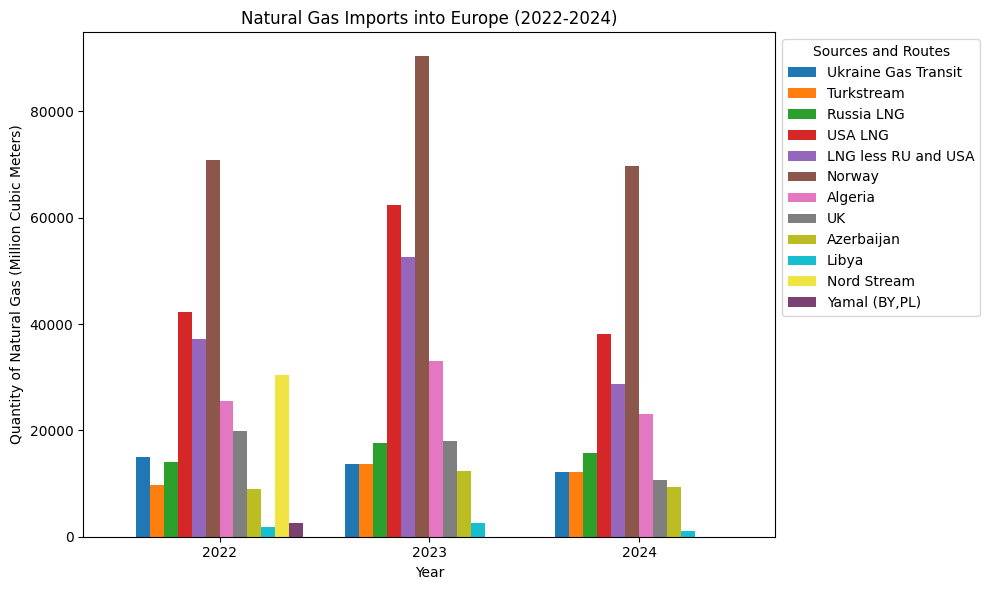

In [26]:
# Ensure the index (years) is sorted
total_year = total_year.sort_index(ascending=True)

# unique color for each category
unique_colors =['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', '#f0e442', '#7b4173', '#d9d9d9', '#ff5a36', '#1b9e77', '#f4a582', '#a6cee3', '#fdbf6f', '#cab2d6', '#ff6347']

# Plot the data with unique colors
ax = total_year.plot(kind='bar', figsize=(10, 6), width=0.8, color=unique_colors[:len(total_year.columns)])

# Add titles and labels
plt.title('Natural Gas Imports into Europe (2022-2024)')
plt.xlabel('Year')
plt.ylabel('Quantity of Natural Gas (Million Cubic Meters)')
plt.xticks(rotation=0)  # Keep year labels horizontal and readable

# Move the legend outside the plot
plt.legend(title='Sources and Routes', bbox_to_anchor=(1, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()


Figure 7:Share of all natural gas imports in Europe from 2022 to 2024(McWilliams, B., G. Sgaravatti, G. Zachmann ,2021)

In [19]:
total_year['Total'] = total_year.sum(axis=1)

for column in total_year.columns[:-1]:  # Exclude the 'Total' column
    total_year[column] = (total_year[column] / total_year['Total']) * 100

total_year = total_year.applymap(lambda x: "{:.2f}".format(x) if isinstance(x, (int, float)) else x)
total_year.drop('Total', axis=1, inplace=True)
total_year

<ipython-input-19-1c0e91cea759>:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  total_year = total_year.applymap(lambda x: "{:.2f}".format(x) if isinstance(x, (int, float)) else x)


,Ukraine Gas Transit,Turkstream,Russia LNG,USA LNG,LNG less RU and USA,Norway,Algeria,UK,Azerbaijan,Libya,Nord Stream,"Yamal (BY,PL)"
2022,5.42,3.52,5.02,15.16,13.34,25.48,9.15,7.12,3.21,0.65,10.96,0.96
2023,4.30,4.33,5.59,19.72,16.62,28.56,10.44,5.70,3.93,0.82,nan,nan
2024,5.55,5.53,7.09,17.28,12.99,31.59,10.43,4.83,4.20,0.50,nan,nan


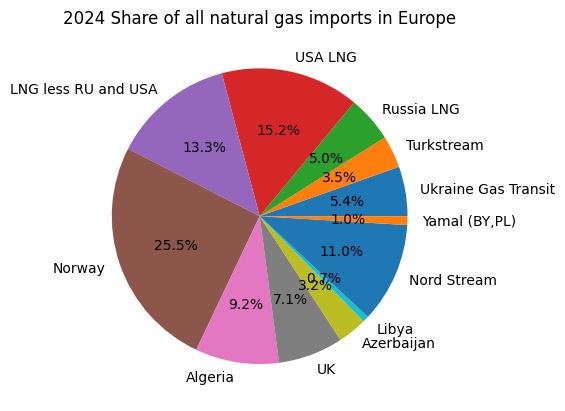

In [20]:
row_2024_data = total_year.iloc[0]
labels = total_year.columns

exclude_indices = []

for i, value in enumerate(row_2024_data):
    try:
        pd.to_numeric(value)
    except ValueError:
        exclude_indices.append(i)

row_2024_data = row_2024_data.drop(row_2024_data.index[exclude_indices])
labels = labels.drop(labels[exclude_indices])

row_2024_data = pd.to_numeric(row_2024_data)

plt.pie(row_2024_data, labels=labels, autopct='%1.1f%%')
plt.title('2024 Share of all natural gas imports in Europe')
plt.show()

Figure 4:Share of all natural gas imports in Europe in 2024(McWilliams, B., G. Sgaravatti, G. Zachmann ,2021)

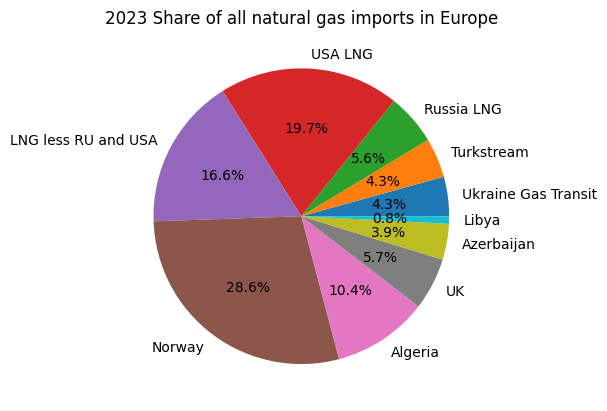

In [21]:
row_2023_data = total_year.iloc[1]
labels = total_year.columns

exclude_indices = []

for i, value in enumerate(row_2023_data):
    try:
        pd.to_numeric(value)
    except ValueError:
        exclude_indices.append(i)

row_2023_data = row_2023_data.drop(row_2023_data.index[exclude_indices])
labels = labels.drop(labels[exclude_indices])

row_2023_data = pd.to_numeric(row_2023_data)

plt.pie(row_2023_data, labels=labels, autopct='%1.1f%%')
plt.title('2023 Share of all natural gas imports in Europe')
plt.show()

Figure 5:Share of all natural gas imports in Europe in 2023(McWilliams, B., G. Sgaravatti, G. Zachmann ,2021)

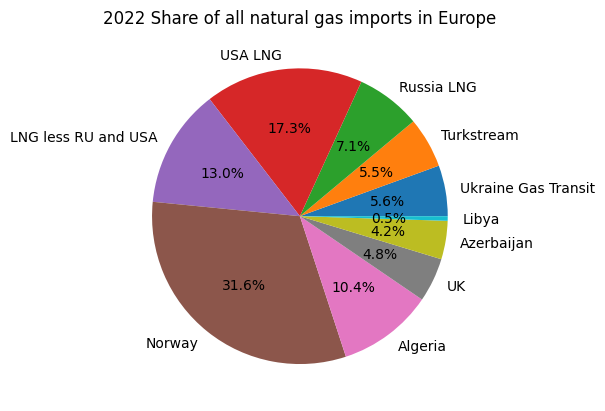

In [22]:
row_2022_data = total_year.iloc[2]
labels = total_year.columns

exclude_indices = []

for i, value in enumerate(row_2022_data):
    try:
        pd.to_numeric(value)
    except ValueError:
        exclude_indices.append(i)

row_2022_data = row_2022_data.drop(row_2022_data.index[exclude_indices])
labels = labels.drop(labels[exclude_indices])

row_2022_data = pd.to_numeric(row_2022_data)

plt.pie(row_2022_data, labels=labels, autopct='%1.1f%%')
plt.title('2022 Share of all natural gas imports in Europe')
plt.show()

Figure 6:Share of all natural gas imports in Europe in 2022(McWilliams, B., G. Sgaravatti, G. Zachmann ,2021)